In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
for class_ in Base.classes:
    print(class_)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first().date


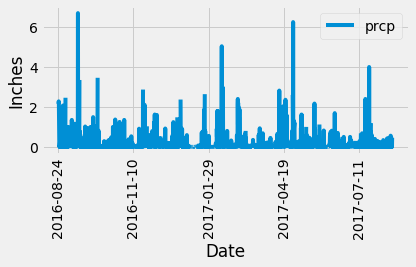

In [35]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dt_recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
prev_year = dt_recent_date - dt.timedelta(days= 365)

# Perform a query to retrieve the data and precipitation scores
prev_year_data = session.query(Measurement).\
                    filter(Measurement.date > prev_year)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql_query(sqlalchemy.select([Measurement.date, Measurement.prcp]).where(Measurement.date > prev_year),
 con = engine, index_col = 'date')

# Sort the dataframe by date
df = df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data

df.reset_index().plot(x = 'date', y ='prcp')
plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()



In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()